### Problem statement: 
#### To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [5]:
# Importing required libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras_cv
from glob import glob
from tensorflow.keras.utils import load_img

c:\Users\DJRJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Directory paths for training and testing datasets
train_dir = r"C:\learning\upgrad\melanoma\Train"  # Training data
test_dir = r"C:\learning\upgrad\melanoma\Test"    # Testing data


In [7]:
# Parameters for data processing

batch_size = 32
img_height = 180
img_width = 180

In [8]:
# Loading the training dataset with a validation split

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [9]:
# Print the structure of the training dataset

print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
# Creating a validation dataset from the test directory

val_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [11]:
# Retrieve and print the class names from the training dataset

class_names = train_ds.class_names
class_number = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


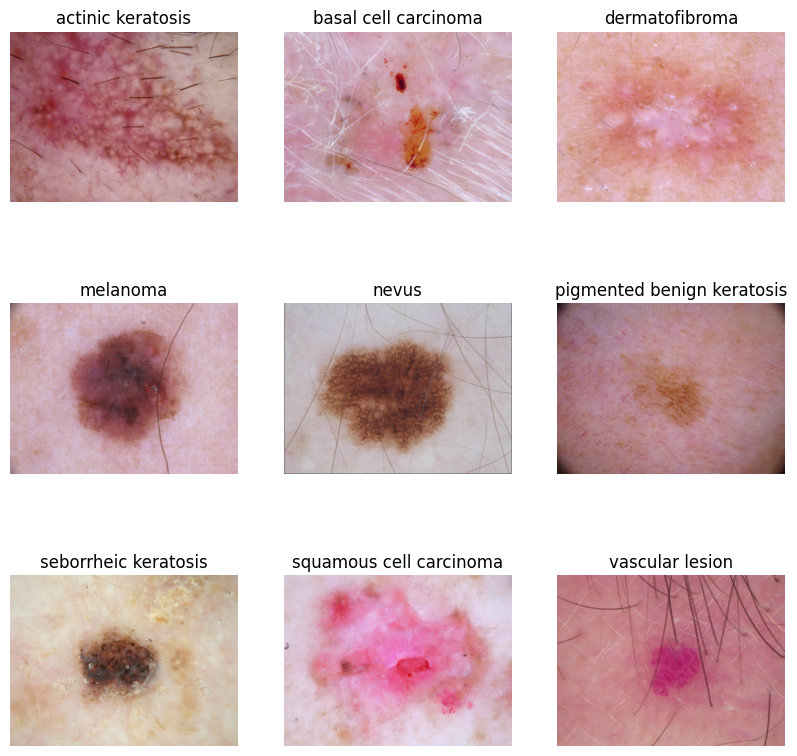

In [12]:
# Visualizing sample images from each class

plt.figure(figsize=(10,10))

for lesion_type in range(class_number):
    class_path = glob(os.path.join(train_dir, class_names[lesion_type], '*'))
    lesion_imgs = list(class_path)
    img=PIL.Image.open(str(lesion_imgs[0]))
    ax = plt.subplot(3,3, lesion_type+1)
    plt.imshow(img)
    plt.title(class_names[lesion_type])
    plt.axis("off")

In [13]:
# Optimize data loading and processing for training and validation datasets

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model 1 : using CNN

In [14]:
# Define a Convolutional Neural Network (CNN) model

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

c:\Users\DJRJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
# Compile the model with specified optimizer, loss function, and evaluation metric

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,659,081 (6.33 MB)

 Trainable params: 1,659,081 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2514 - loss: 1.9157 - val_accuracy: 0.2174 - val_loss: 2.6654
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.5130 - loss: 1.3122 - val_accuracy: 0.2174 - val_loss: 2.8320
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.6386 - loss: 0.9902 - val_accuracy: 0.2609 - val_loss: 3.5019
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.7576 - loss: 0.6931 - val_accuracy: 0.2609 - val_loss: 3.1784
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.8247 - loss: 0.5017 - val_accuracy: 0.3043 - val_loss: 3.5520
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.8766 - loss: 0.3404 - val_accuracy: 0.3043 - val_loss: 6.4278
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.9015 - loss: 0.2719 - val_accuracy: 0.3478 - val_loss: 5.0310
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.9257 - loss: 0.2117 -

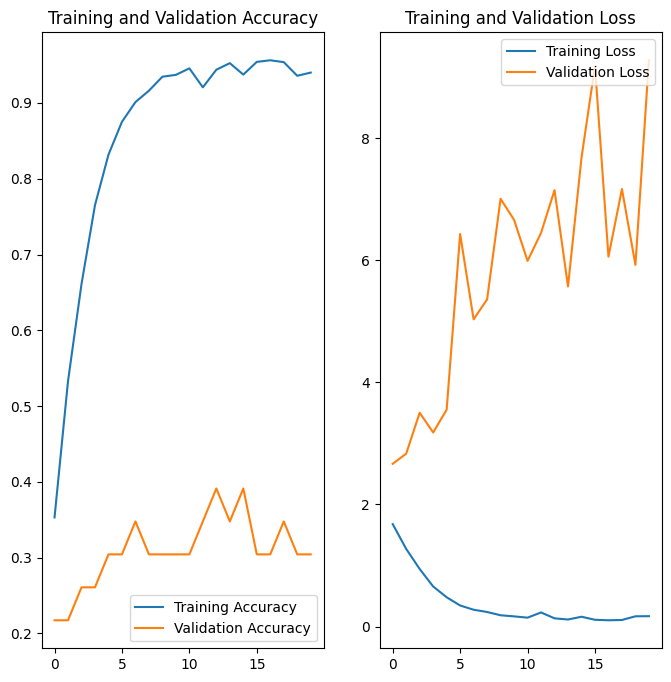

In [18]:
# Extract training and validation metrics

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy and loss

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings after the model fit: Evidence of overfit or underfit
#### The model shows clear signs of overfitting as the training accuracy reaches around 95%, but the validation accuracy remains low at approximately 34%.
#### Similarly, the training loss decreases steadily with each epoch, while the validation loss fluctuates and remains significantly higher, highlighting the gap between training and validation #### performance.

In [19]:
# Data augmentation using Keras Sequential API
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [20]:
# Preprocess datasets with data augmentation
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize image
    image = data_augmentation(image)  # Apply data augmentation
    return image, label

train_ds_augmented = train_ds.map(preprocess).prefetch(buffer_size=AUTOTUNE)

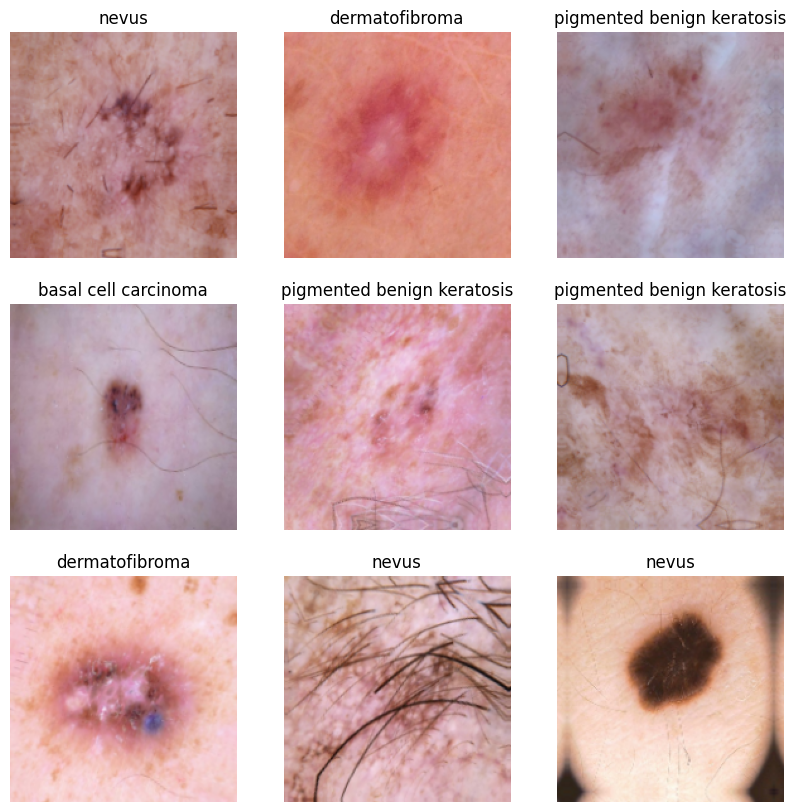

In [21]:
# Visualize augmented images
def visualize_augmented_images():
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(9):
            # Expand dims to mimic a batch for the augmentation layer
            augmented_image = data_augmentation(tf.expand_dims(images[i], axis=0))[0]
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_image.numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

visualize_augmented_images()

# Model 2 : Post augmentation

In [22]:
# Define a CNN model with dropout layers for regularization
dropout_conv = 0.05
dropout_dense = 0.25
num_classes = len(class_names)

model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),  # Rescaling is still needed
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(dropout_conv),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(dropout_conv),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(dropout_conv),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(dropout_dense),
    layers.Dense(num_classes, activation='softmax')
])

In [23]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the CNN model using the augmented training dataset
epochs = 20
history = model.fit(
    train_ds_augmented,  # Use the augmented dataset
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 67s 235ms/step - accuracy: 0.1950 - loss: 2.1926 - val_accuracy: 0.2609 - val_loss: 2.0872
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 234ms/step - accuracy: 0.4053 - loss: 1.5155 - val_accuracy: 0.2609 - val_loss: 2.1501
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 235ms/step - accuracy: 0.4575 - loss: 1.3994 - val_accuracy: 0.2609 - val_loss: 1.9794
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 234ms/step - accuracy: 0.4927 - loss: 1.2961 - val_accuracy: 0.2609 - val_loss: 2.0997
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 234ms/step - accuracy: 0.5196 - loss: 1.2446 - val_accuracy: 0.2609 - val_loss: 2.8147
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 235ms/step - accuracy: 0.5358 - loss: 1.2129 - val_accuracy: 0.2174 - val_loss: 3.0803
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 73s 259ms/step - accuracy: 0.5523 - loss: 1.1720 - val_accuracy: 0.3043 - val_loss: 2.1169
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 67s 238ms/step - accuracy: 0.5633 - loss: 1

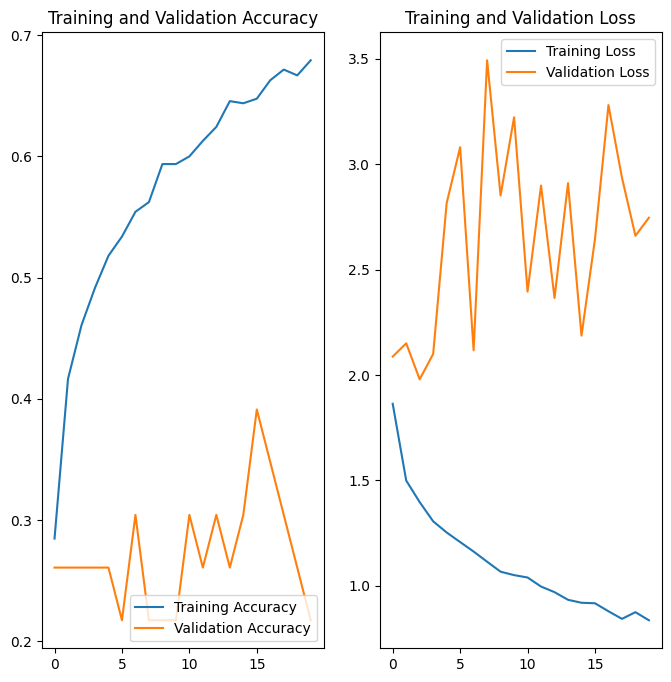

In [25]:
# Extract training and validation metrics from the history object

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy and loss

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
#### There is clearly evidence of overfitting, with the difference between training accuracy and validation accuracy being greater than 0.5. In addition, as can be observed in the graphs above, as training proceeds, while training loss decreases, validation loss increases.

Found 11239 files belonging to 9 classes.
Using 8992 files for training.
actinic keratosis : 114
basal cell carcinoma : 376
dermatofibroma : 95
melanoma : 438
nevus : 357
pigmented benign keratosis : 462
seborrheic keratosis : 77
squamous cell carcinoma : 181
vascular lesion : 139


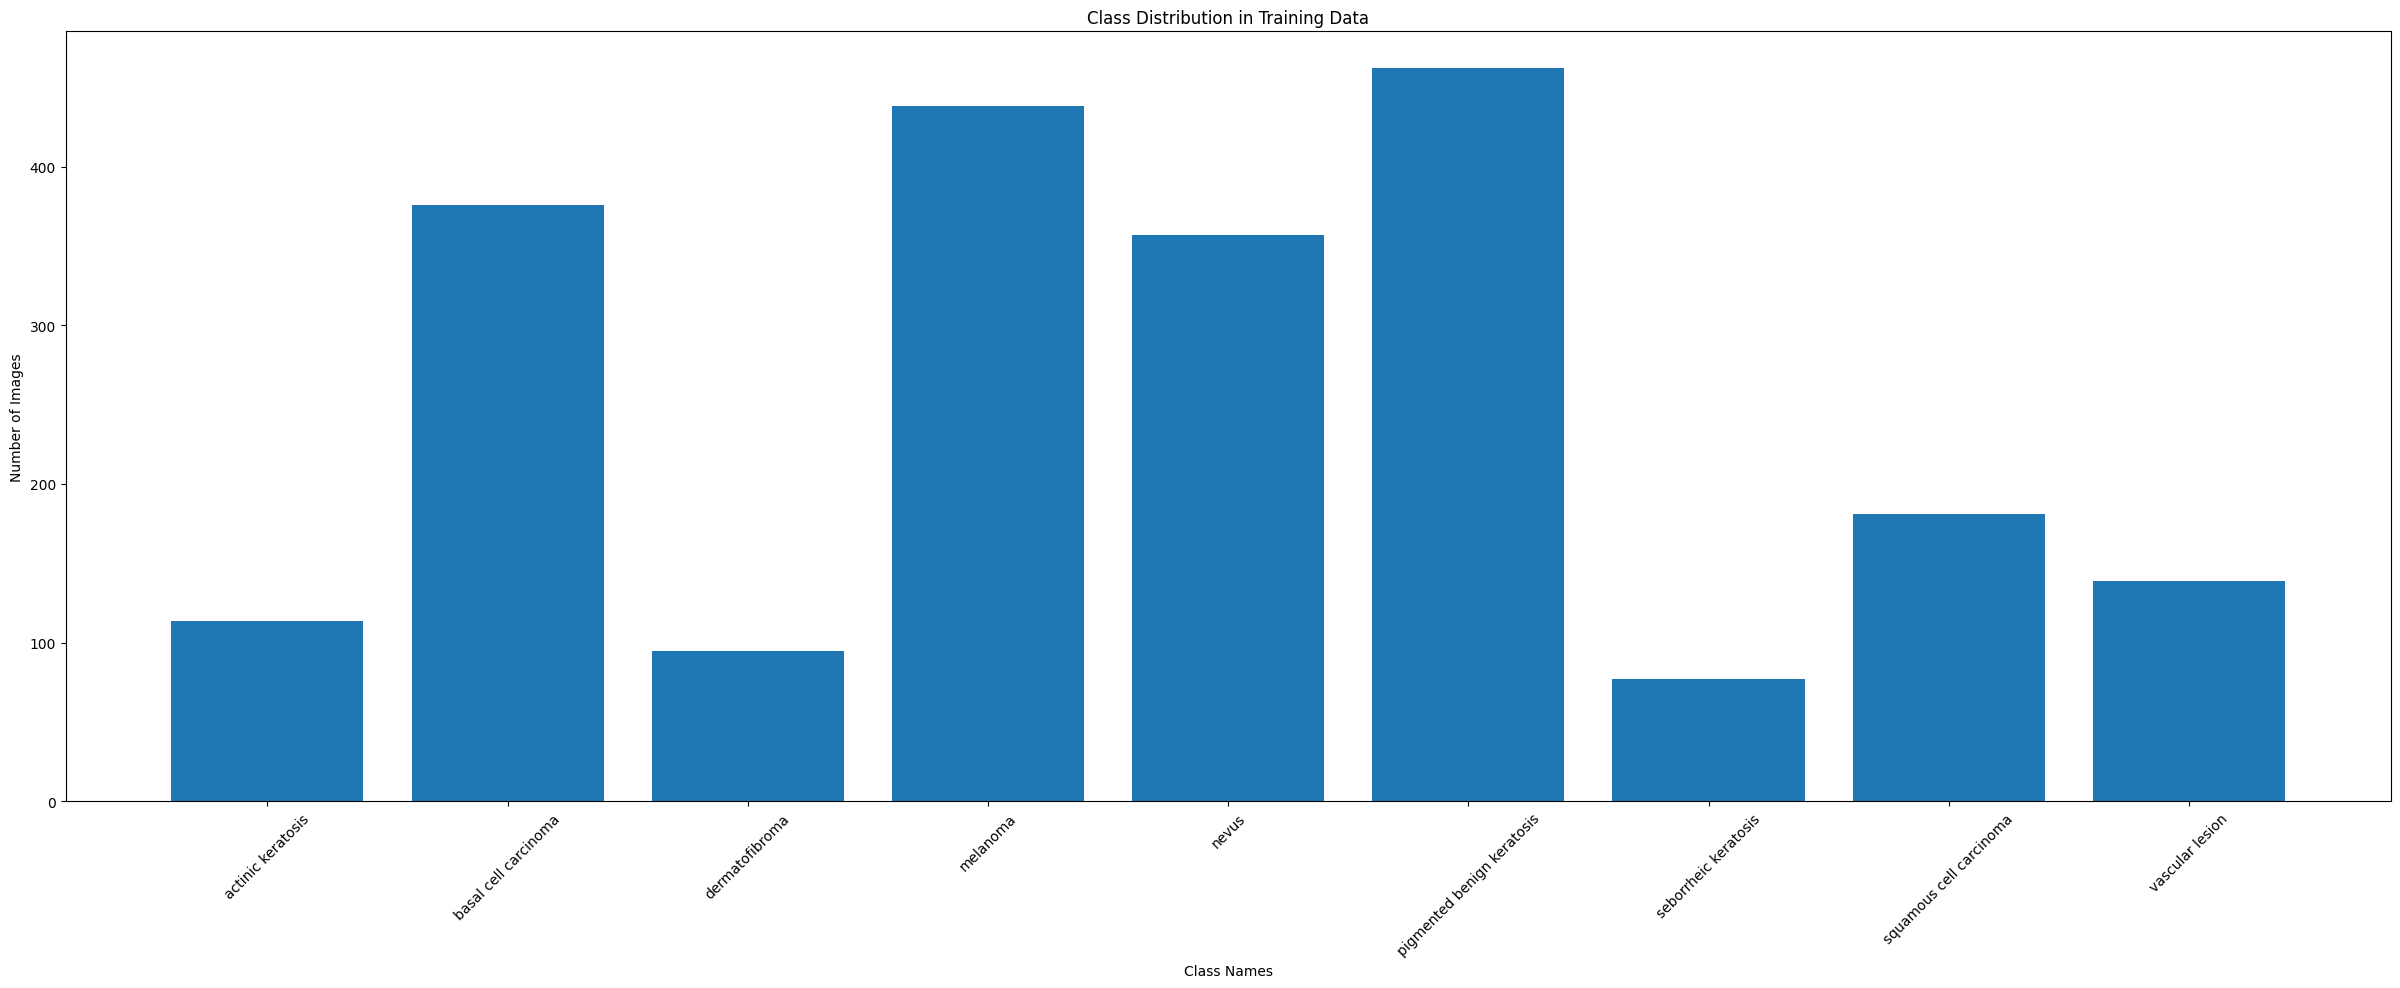

In [28]:
# Set parameters
train_dir = pathlib.Path('./Train')  # Directory where the training images are stored

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(180, 180),  # Resize images
    batch_size=32
)

# Extract class names directly from the directory
class_names = train_ds.class_names  # This is available directly from the dataset object

# Calculate the number of images per class by counting all .jpg files in each class directory
distribution = list(map(lambda class_name: len(list(train_dir.glob(class_name + '/*.jpg'))), class_names))

# Print the class names along with their respective image counts
for class_name, count in zip(class_names, distribution):
    print(class_name, count, sep=' : ')

# Plot the class distribution as a bar chart
plt.figure(figsize=(30, 10))
plt.bar(class_names, distribution)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show() 


#### Which class has the least number of samples?
##### seborrheic keratosis has the least number of samples at just 77

#### Which classes dominate the data in terms proportionate number of samples?
##### pigmented benign keratosis, melanoma, basal cell carcinoma and nevus dominates the data in terms of proportionate number of sample.

In [29]:
import Augmentor

# Augment training data to handle class imbalance

for i in class_names:
    p = Augmentor.Pipeline(str(train_dir) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x23606EEB260>: 100%|██████████| 500/500 [00:01<00:00, 421.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x23606E015E0>: 100%|██████████| 500/500 [00:01<00:00, 399.45 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23606E01700>: 100%|██████████| 500/500 [00:01<00:00, 403.02 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x233C44EC4D0>: 100%|██████████| 500/500 [00:06<00:00, 82.75 Samples/s]   


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23606E24080>: 100%|██████████| 500/500 [00:05<00:00, 99.28 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23606E269C0>: 100%|██████████| 500/500 [00:01<00:00, 410.60 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x233C4304590>: 100%|██████████| 500/500 [00:03<00:00, 157.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23606F346E0>: 100%|██████████| 500/500 [00:01<00:00, 408.31 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x23606DEBAD0>: 100%|██████████| 500/500 [00:01<00:00, 397.51 Samples/s]                  


In [30]:
# Print the total number of training images

train_dir = pathlib.Path(train_dir) if not isinstance(train_dir, pathlib.Path) else train_dir
image_count_train = len(list(train_dir.glob('*/output/*.jpg')))
print(f"Number of training images: {image_count_train}")

Number of training images: 13500


In [31]:
# Define parameters for image processing

batch_size = 32
img_height = 180
img_width = 180

In [32]:
# Load the training dataset from the specified directory

data_dir_train = pathlib.Path('./Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


In [33]:
# Load the validation dataset from the specified directory

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


# Model 3 : Post handling of class imbalance

In [34]:
# Define a CNN model (model3) with 3 convolutional layers and a dense output layer

num_classes = 9

model3 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [35]:
# Compile the model (model3)

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
# Train model3 for 30 epochs

epochs = 30
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 113ms/step - accuracy: 0.2663 - loss: 1.8822 - val_accuracy: 0.5078 - val_loss: 1.2896
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.4980 - loss: 1.3137 - val_accuracy: 0.5281 - val_loss: 1.2870
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.6222 - loss: 1.0180 - val_accuracy: 0.6679 - val_loss: 0.9039
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.7082 - loss: 0.8156 - val_accuracy: 0.7642 - val_loss: 0.6698
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.7840 - loss: 0.5956 - val_accuracy: 0.6956 - val_loss: 0.9548
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 48s 121ms/step - accuracy: 0.8424 - loss: 0.4410 - val_accuracy: 0.7779 - val_loss: 0.6308
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.8704 - loss: 0.3599 - val_accuracy: 0.8805 - val_loss: 0.3788
Epoch 8/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.8957 - loss: 0

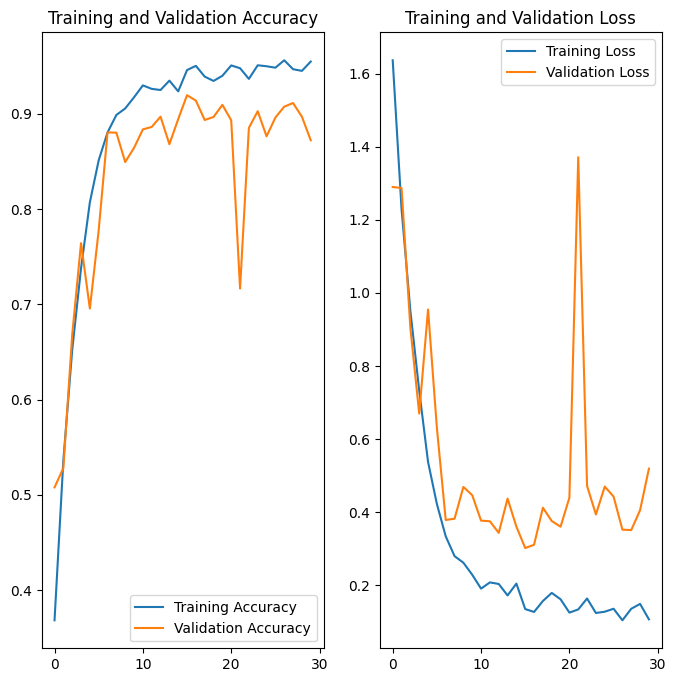

In [37]:
# Extract training and validation metrics from the history object

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy and loss

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Results Analysis
#### The results with dataset augmentation have shown significant improvement over previous models, with training accuracy of approx. 95% at 30 epochs, and validation accuracy at approx. 87%. Judging by the large fluctuations in the validation loss, it is recommended to rerun the training with a reducing learning rate. The model seems to be jumping around a local minimum.Possibly including a callback to reduce the learning rate once an accuracy of 0.8 has been reached may lead to improvements.